In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [183]:
#reading csv file
data=pd.read_csv("Desktop\insurance_claim_fraud.csv")

In [184]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


EDA

In [185]:
data.shape

(1000, 40)

#### our data set has 1000 rows and 40 columns including our target variable fraud_Reported

Checking null values

In [186]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The column _c39 has null values and it does not provide any information so dropping of the column

In [187]:
data=data.dropna(how='any',axis=1)

Let us check the data  set now

In [188]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


As we can see there is a special charecter in one of the columns which is police_report_available,Let us check whether we can special charecters in other columns in our data set.For this let us consider value_counts() function.

In [189]:
data['months_as_customer'].value_counts()

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

So our months_as_customer column do not have any ? values

In [190]:
data['age'].value_counts()

43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

Age column also do not have special charecters.

Let us check the data types of all the columns.

In [191]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

So now let us check for special charecters in our data set

In [192]:
for i in data.columns:
    print(i,data.loc[data[i]=="?",i].size)

months_as_customer 0
age 0
policy_number 0
policy_bind_date 0
policy_state 0
policy_csl 0
policy_deductable 0
policy_annual_premium 0
umbrella_limit 0
insured_zip 0
insured_sex 0
insured_education_level 0
insured_occupation 0
insured_hobbies 0
insured_relationship 0
capital-gains 0
capital-loss 0
incident_date 0
incident_type 0
collision_type 178
incident_severity 0
authorities_contacted 0
incident_state 0
incident_city 0
incident_location 0
incident_hour_of_the_day 0
number_of_vehicles_involved 0
property_damage 360
bodily_injuries 0
witnesses 0
police_report_available 343
total_claim_amount 0
injury_claim 0
property_claim 0
vehicle_claim 0
auto_make 0
auto_model 0
auto_year 0
fraud_reported 0


So as shown in above output the columns collision_type,propety_damage and police_report_available has the special charecters which need to be replaced.

Now let us replace the special charecters that we seen in above column with  the most commonly occuring value in that column.

In [193]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

So RearCollision is the most commonly occuring value in that column so let us replace it.

In [194]:
data['collision_type']=data['collision_type'].replace('?','Rear Collision')

Let us check for null values in collision_type column.

In [195]:
data['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

so we have successfully replaced the ? in collision_type column in the same manner let us replace it for remaining columns property_damage and police_report_available.

In [196]:
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

Here No is the second most frequently occuring element so let us replace the data

In [197]:
data['property_damage']=data['property_damage'].replace('?','NO')

Let us check whether we filled it correctly

In [198]:
data['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [199]:
#similarly doing same for police_report_available column
data['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [200]:
data['police_report_available']=data['police_report_available'].replace('?','NO')

In [201]:
data['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

so we successfully replaced the ? column in our data set.

In [202]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [203]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

The above column gives us the overall columns in our data set and from this we can drop policy_number,policy_bind_date,policy_state,insured_zip,incident_location,incident_state,incident_city,auto_make and auto_model and auto_year columns as they are not useful to predict our model so let us drop them.

In [204]:
columns=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location',
                        'incident_date','incident_state','incident_city','auto_make',
                      'auto_model','auto_year']

In [205]:
data.drop(columns,axis=1,inplace=True)

In [206]:
data.shape

(1000, 28)

Let us describe our data set

In [207]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


Great we do not have any missing values here so we can proceed further

Let us check the correlation now

In [210]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449


To better understand let us plot a heat map

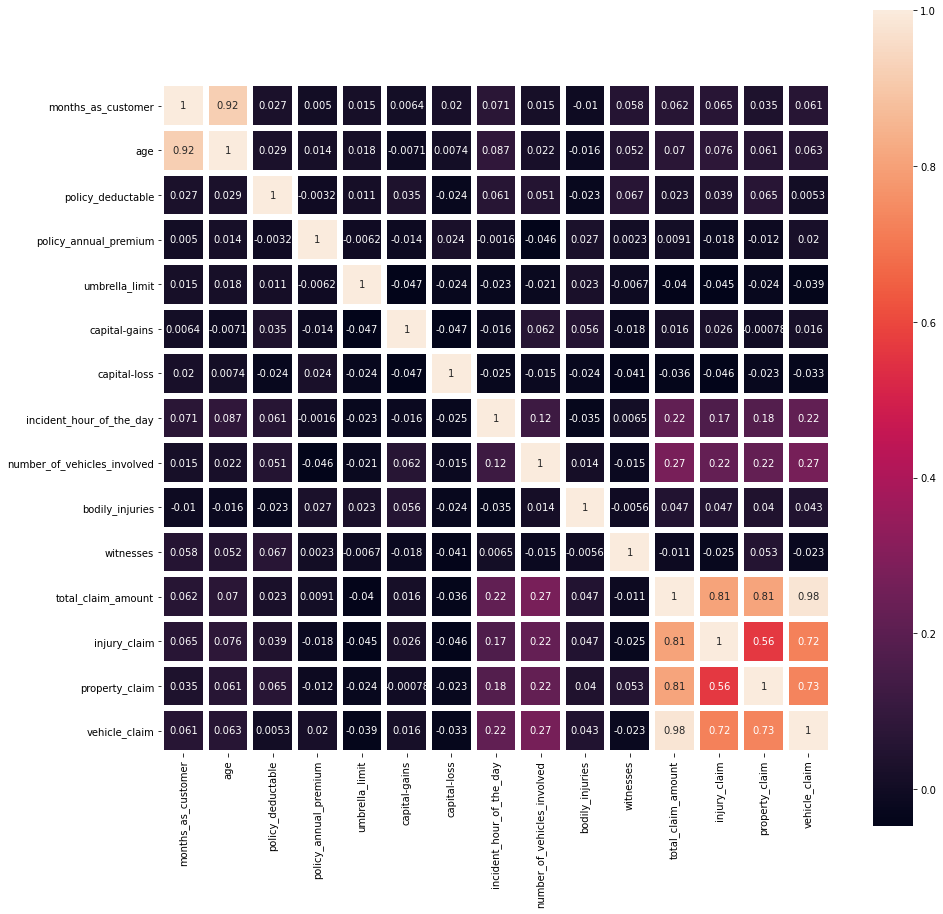

In [211]:
plt.figure(figsize=(15,15))
heat=sns.heatmap(data.corr(),linewidth=5,square=True,annot=True)

Here we are not able to find our categorical columns in our data set and also the target variable so let us use encoding techniques to convert the categorical columns in to numerical.

Before applying encoding techniques let us do visualization

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>],
       [<AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <

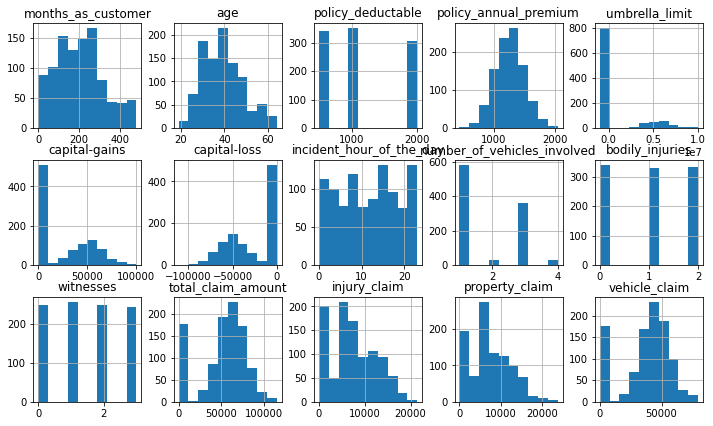

In [215]:
data.hist(figsize=(12,12),layout=(5,5))

The histogram does not gives us a clear picture so let us proceed further and find out the outliers using box plots

months_as_customer                AxesSubplot(0.125,0.749828;0.133621x0.130172)
age                            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
policy_deductable               AxesSubplot(0.44569,0.749828;0.133621x0.130172)
policy_annual_premium          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
umbrella_limit                 AxesSubplot(0.766379,0.749828;0.133621x0.130172)
capital-gains                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
capital-loss                   AxesSubplot(0.285345,0.593621;0.133621x0.130172)
incident_hour_of_the_day        AxesSubplot(0.44569,0.593621;0.133621x0.130172)
number_of_vehicles_involved    AxesSubplot(0.606034,0.593621;0.133621x0.130172)
bodily_injuries                AxesSubplot(0.766379,0.593621;0.133621x0.130172)
witnesses                         AxesSubplot(0.125,0.437414;0.133621x0.130172)
total_claim_amount             AxesSubplot(0.285345,0.437414;0.133621x0.130172)
injury_claim                    AxesSubp

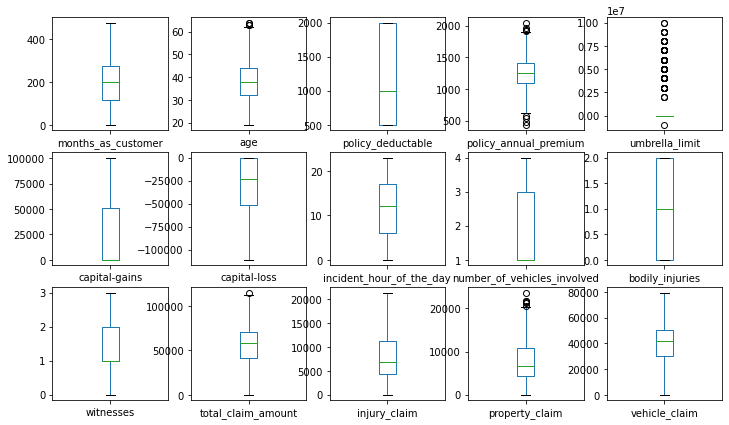

In [216]:
data.plot(kind='box',figsize=(12,12),layout=(5,5),subplots=True)

There are huge outliers in umbrella_limit but it is continuous so we wont remove any outliers from it

Now let use feature scaling to convert categorical columns into numerical.

In [217]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [218]:
data=data.apply(LabelEncoder().fit_transform)
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,299,29,1,1,732,1,1,4,2,17,...,0,1,1,2,1,563,258,512,545,1
1,212,23,1,2,396,5,1,4,6,15,...,0,0,0,0,0,44,46,45,38,1
2,123,10,0,2,740,5,0,6,11,2,...,2,0,2,3,0,143,337,104,116,0
3,239,22,1,2,743,6,0,6,1,2,...,0,0,1,2,0,451,245,249,521,1
4,212,25,2,1,902,6,1,0,11,2,...,0,0,0,1,0,81,70,36,66,0


So we converted our categorical columns in to numerical

Let us check the class imbalance issue now

Class imbalance

In [219]:
data['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

so clearly there is a class imbalance issue so let us resolve it now but first let us plot a count plot to better understand it.

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

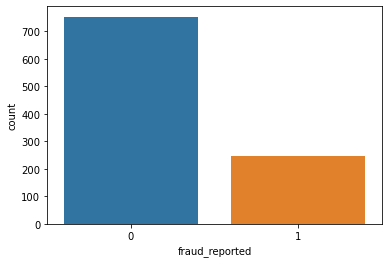

In [220]:
sns.countplot(data['fraud_reported'],data=data)

To solve the class imbalance issue let use smote first let us build the model

In [223]:
x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

Solving class imbalance now

In [224]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,Y=sm.fit_resample(x,y)

In [226]:
Y.value_counts()

1    753
0    753
Name: fraud_reported, dtype: int64

So we have balanced our class now.so let us build a model and find the best random state

Finding best random state

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [228]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is:",maxAccu,"on Random state:",maxRs)

Best Accuracy is: 0.8539823008849557 on Random state: 180


So best Accuracy is 85% and random state is 180

In [229]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=maxRs)

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [234]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       224
           1       0.85      0.84      0.84       228

    accuracy                           0.84       452
   macro avg       0.84      0.84      0.84       452
weighted avg       0.84      0.84      0.84       452



So Decision Tree gives 86% accuracy and let us plot a confusion matrix for it

In [235]:
confusion_matrix(y_test,pred)

array([[189,  35],
       [ 36, 192]], dtype=int64)

In [236]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       224
           1       0.87      0.88      0.88       228

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452



Random forest classifier gives us 87% accuracy plotting a confusion matrix for random forest

In [237]:
rf=confusion_matrix(y_test,pred)

In [238]:
rf

array([[194,  30],
       [ 27, 201]], dtype=int64)

In [239]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.61      0.40      0.48       224
           1       0.56      0.75      0.64       228

    accuracy                           0.58       452
   macro avg       0.59      0.58      0.56       452
weighted avg       0.59      0.58      0.56       452



Support vector gives 58% accuracy plotting confusion matrix for support vector

In [240]:
svc=confusion_matrix(y_test,pred)
svc

array([[ 89, 135],
       [ 56, 172]], dtype=int64)

Now let us use cross validation score to find the best model

In [243]:
from sklearn.model_selection import cross_val_score
print("Cross validation score of Decision Tree classifier:",cross_val_score(DTC,X,Y,cv=5).mean())
print("Cross validation score of Random Forest Classifier:",cross_val_score(RFC,X,Y,cv=5).mean())
print("Cross validation Score of support vector Classifier:",cross_val_score(sv,X,Y,cv=5).mean())

Cross validation score of Decision Tree classifier: 0.8134804514752151
Cross validation score of Random Forest Classifier: 0.8626234846318013
Cross validation Score of support vector Classifier: 0.6088776924600119


So the Difference between the Accuracy score and cross validation score is low in Random Forest Classifier so we consider it as best model.In the next step we will do hyper parameter tuning for the best model.

HYPER PARAMETER TUNING

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
from sklearn.ensemble import RandomForestClassifier

In [266]:
parameters={'n_estimators':[200,700],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy']}

In [267]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [268]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [269]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [271]:
Fraud=RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=700)
Fraud.fit(x_train,y_train)
pred=Fraud.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score of Random forest classifier:",acc*100)

Accuracy score of Random forest classifier: 87.16814159292035


Accuracy score is 87.16% for random forest classifier.

In [273]:
print("Printing confusion matrix for our Predicted data:")
matrix=confusion_matrix(y_test,pred)
matrix

Printing confusion matrix for our Predicted data:


array([[190,  34],
       [ 24, 204]], dtype=int64)

Let us calculate the roc_auc_score

In [274]:
print("Roc auc score of our predicted model:",roc_auc_score(y_test,pred))

Roc auc score of our predicted model: 0.8714755639097744


So the rou auc score of the model is 87.14%

Let us plot ROC AUC curve for the predicted model.

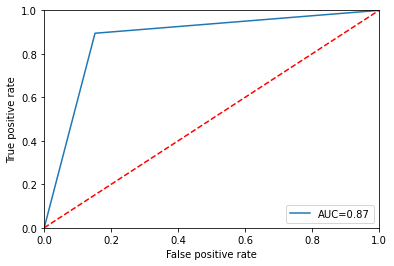

In [278]:
from sklearn import metrics
false_postive,true_positive,Threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(false_postive,true_positive)
plt.plot(false_postive,true_positive,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

So from the above roc auc curve we can predict that our model gives Auc score of 87%

###### saving the model

In [279]:
import joblib
joblib.dump(pred,"Fraud.pkl")

['Fraud.pkl']